In [37]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

from src.features import Clustering, DistanceCalculator, Geographical, Interactions, Temporal



In [38]:
RANDOM_STATE = 95

In [45]:
base_dir = Path.cwd().parent
model_path = os.path.join(base_dir, "CE263N Assignment 4", "train.csv")
TRAIN_CSV_PATH = model_path
df = pd.read_csv(TRAIN_CSV_PATH)
df

,row_id,start_lng,start_lat,end_lng,end_lat,datetime,duration
0,0,-73.783279,40.644718,-73.963799,40.681320,2015-01-09 00:51:48,1815.0
1,1,-122.422385,37.789408,-122.419890,37.766692,2012-09-14 01:46:00,300.0
2,2,-73.885292,40.773060,-74.000076,40.761360,2015-04-19 20:26:57,2620.0
3,3,-122.401603,37.788975,-122.410958,37.796447,2012-09-03 23:48:00,360.0
4,4,-74.008728,40.714317,-74.006432,40.731720,2015-01-21 12:14:45,582.0
...,...,...,...,...,...,...,...
145996,145996,-74.017975,40.706478,-74.002213,40.686069,2015-05-27 23:38:58,713.0
145997,145997,-73.968781,40.757835,-73.951843,40.769596,2015-01-07 02:58:34,308.0
145998,145998,-74.005699,40.740265,-73.982620,40.777214,2015-09-07 00:17:32,677.0
145999,145999,-73.972466,40.754219,-73.974335,40.759819,2015-11-09 15:13:00,435.0


# Null Values

<Axes: title={'center': 'After dropna'}>

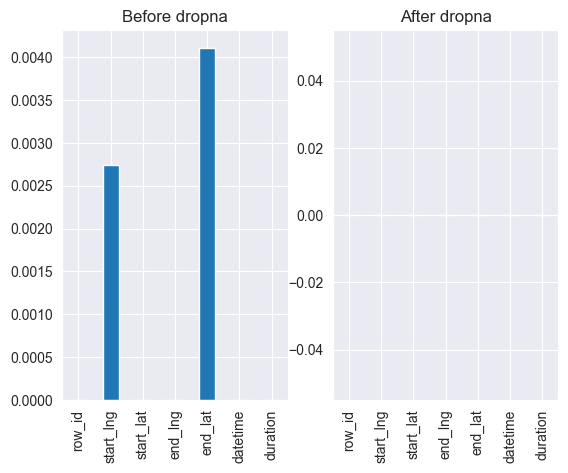

In [8]:
null_before = df.isnull().sum() / len(df)
df_clean = df.dropna()
null_after = df_clean.isnull().sum() / len(df_clean)

fig, axes = plt.subplots(1, 2)
null_before.plot(kind='bar', ax=axes[0], title='Before dropna')
null_after.plot(kind='bar', ax=axes[1], title='After dropna')

In [9]:
df = df_clean

# outliers

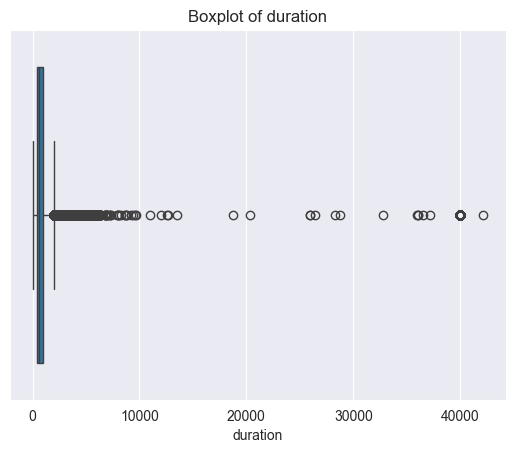

In [10]:
sns.boxplot(x=df['duration'])
plt.title('Boxplot of duration')
plt.show()

In [11]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]
outliers.shape[0] / len(df)

0.054813415079896004

In [12]:
df_no_outliers = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

In [13]:
Q1 = df_no_outliers['duration'].quantile(0.25)
Q3 = df_no_outliers['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_no_outliers[(df_no_outliers['duration'] < lower_bound) | (df_no_outliers['duration'] > upper_bound)]
outliers.shape[0] / len(df_no_outliers)

0.016292966954389906

# Datetime

In [14]:
datetime_df = Temporal().create(df)
datetime_df

,row_id,start_lng,start_lat,end_lng,end_lat,datetime,duration,hour,month,day_of_week,is_weekend,is_morning_rush,is_evening_rush,is_rush_hour
0,0,-73.783279,40.644718,-73.963799,40.681320,2015-01-09 00:51:48,1815.0,0,1,4,0,0,0,0
1,1,-122.422385,37.789408,-122.419890,37.766692,2012-09-14 01:46:00,300.0,1,9,4,0,0,0,0
2,2,-73.885292,40.773060,-74.000076,40.761360,2015-04-19 20:26:57,2620.0,20,4,6,1,0,0,0
3,3,-122.401603,37.788975,-122.410958,37.796447,2012-09-03 23:48:00,360.0,23,9,0,0,0,0,0
4,4,-74.008728,40.714317,-74.006432,40.731720,2015-01-21 12:14:45,582.0,12,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145996,145996,-74.017975,40.706478,-74.002213,40.686069,2015-05-27 23:38:58,713.0,23,5,2,0,0,0,0
145997,145997,-73.968781,40.757835,-73.951843,40.769596,2015-01-07 02:58:34,308.0,2,1,2,0,0,0,0
145998,145998,-74.005699,40.740265,-73.982620,40.777214,2015-09-07 00:17:32,677.0,0,9,0,0,0,0,0
145999,145999,-73.972466,40.754219,-73.974335,40.759819,2015-11-09 15:13:00,435.0,15,11,0,0,0,0,0


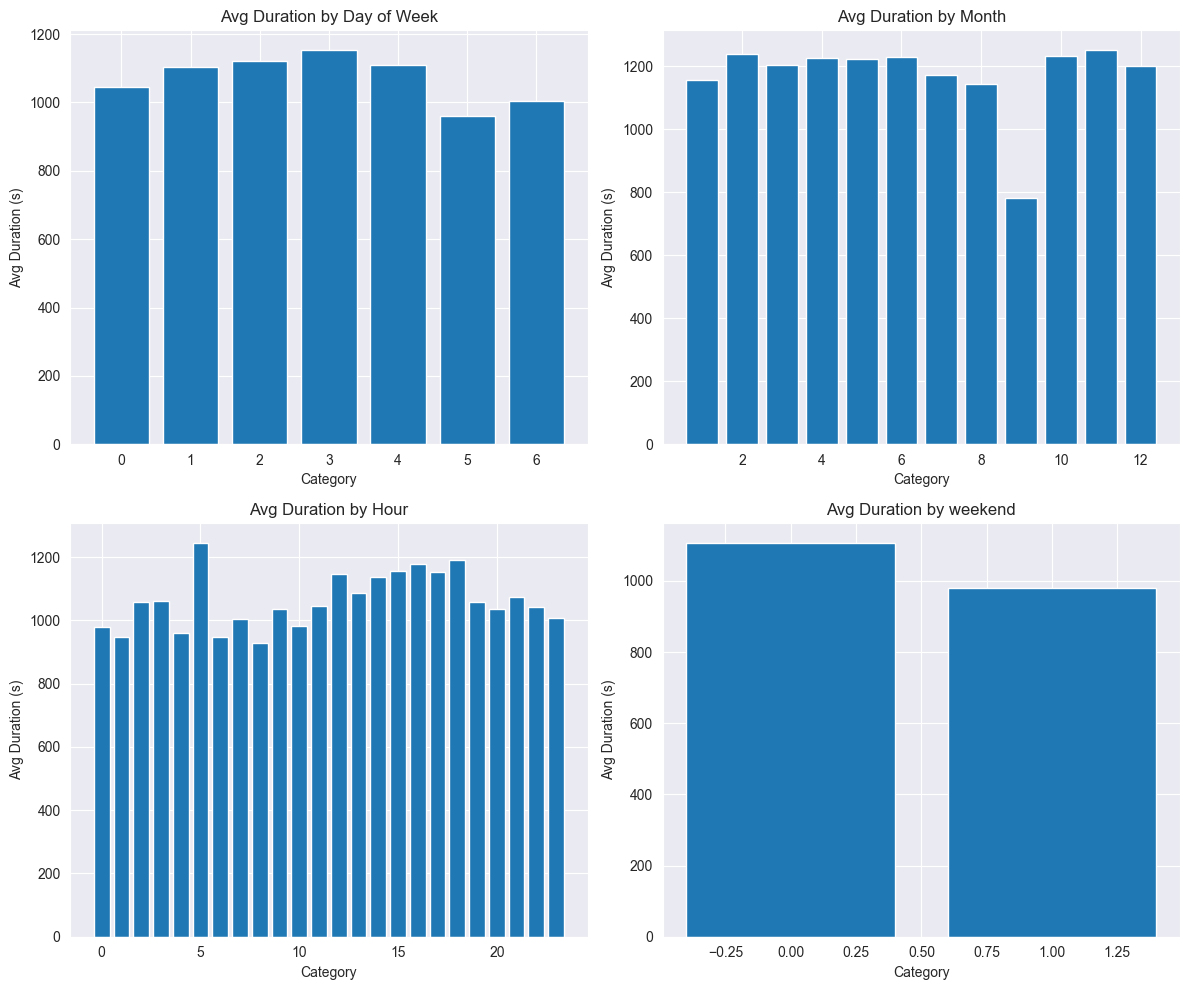

In [18]:
avg_by_day_of_week = datetime_df.groupby('day_of_week')['duration'].mean()
avg_by_month = datetime_df.groupby('month')['duration'].mean()
avg_by_hour = datetime_df.groupby('hour')['duration'].mean()
avg_by_weekend = datetime_df.groupby('is_weekend')['duration'].mean()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

plots = [
    ('Avg Duration by Day of Week', avg_by_day_of_week),
    ('Avg Duration by Month', avg_by_month),
    ('Avg Duration by Hour', avg_by_hour),
    ('Avg Duration by weekend', avg_by_weekend)
]

for i, (title, data) in enumerate(plots):
    axes[i].bar(data.index, data.values)
    axes[i].set_title(title)
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Avg Duration (s)')

plt.tight_layout()
plt.show()

# Coodinates

In [19]:
distance_df = DistanceCalculator().calculate(df)
distance_df

,row_id,start_lng,start_lat,end_lng,end_lat,datetime,duration,distance_km
0,0,-73.783279,40.644718,-73.963799,40.681320,2015-01-09 00:51:48,1815.0,15.760961
1,1,-122.422385,37.789408,-122.419890,37.766692,2012-09-14 01:46:00,300.0,2.535404
2,2,-73.885292,40.773060,-74.000076,40.761360,2015-04-19 20:26:57,2620.0,9.753753
3,3,-122.401603,37.788975,-122.410958,37.796447,2012-09-03 23:48:00,360.0,1.168773
4,4,-74.008728,40.714317,-74.006432,40.731720,2015-01-21 12:14:45,582.0,1.944774
...,...,...,...,...,...,...,...,...
145996,145996,-74.017975,40.706478,-74.002213,40.686069,2015-05-27 23:38:58,713.0,2.629799
145997,145997,-73.968781,40.757835,-73.951843,40.769596,2015-01-07 02:58:34,308.0,1.935252
145998,145998,-74.005699,40.740265,-73.982620,40.777214,2015-09-07 00:17:32,677.0,4.545184
145999,145999,-73.972466,40.754219,-73.974335,40.759819,2015-11-09 15:13:00,435.0,0.642283


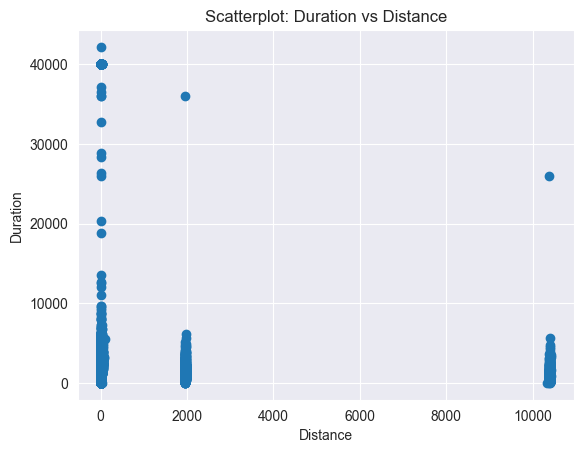

In [21]:
plt.scatter(distance_df['distance_km'],distance_df['duration'])
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.title('Scatterplot: Duration vs Distance')
plt.show()

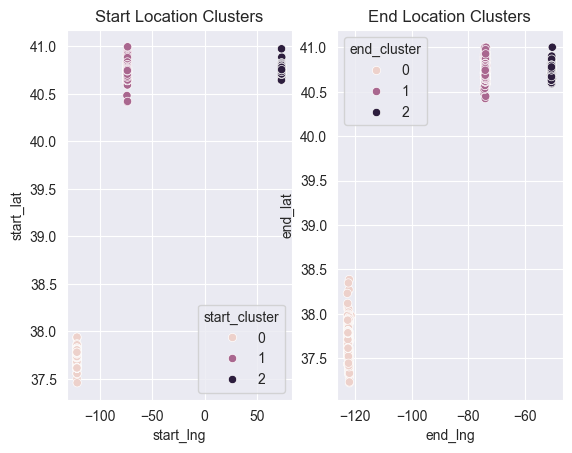

In [24]:
distance_df = Clustering().create_columns(df)
df = df.dropna()
train_df = Clustering().create_columns(df)
_, axes = plt.subplots(1, 2)

sns.scatterplot(data=train_df, x='start_lng', y='start_lat', hue='start_cluster', ax=axes[0])
axes[0].set_title("Start Location Clusters")
sns.scatterplot(data=train_df, x='end_lng', y='end_lat', hue='end_cluster',ax=axes[1])
axes[1].set_title("End Location Clusters")
plt.show()

<Axes: title={'center': 'Cluster 2'}, xlabel='end_lng', ylabel='end_lat'>

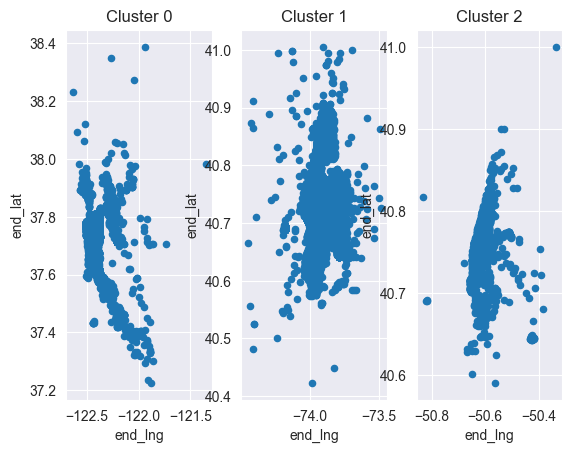

In [25]:
_, axes = plt.subplots(1, 3)
distance_df[distance_df['end_cluster'] == 0].plot.scatter(x='end_lng', y='end_lat', ax=axes[0], title='Cluster 0')
distance_df[distance_df['end_cluster'] == 1].plot.scatter(x='end_lng', y='end_lat', ax=axes[1], title='Cluster 1')
distance_df[distance_df['end_cluster'] == 2].plot.scatter(x='end_lng', y='end_lat', ax=axes[2], title='Cluster 2')

<Axes: title={'center': 'End Cluster'}, xlabel='end_cluster'>

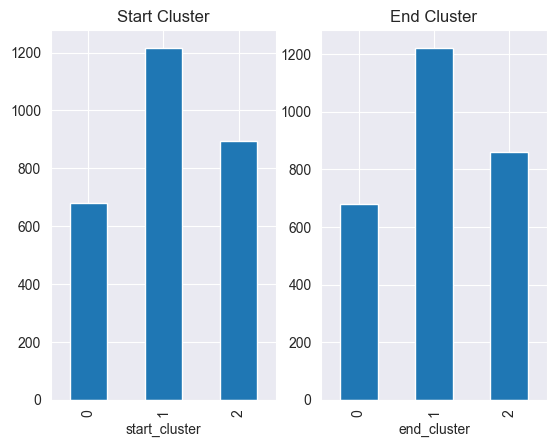

In [26]:
_, axes = plt.subplots(1, 2)
distance_df.groupby('start_cluster')['duration'].mean().plot(kind='bar', title='Start Cluster', ax=axes[0])
distance_df.groupby('end_cluster')['duration'].mean().plot(kind='bar', title='End Cluster', ax=axes[1])

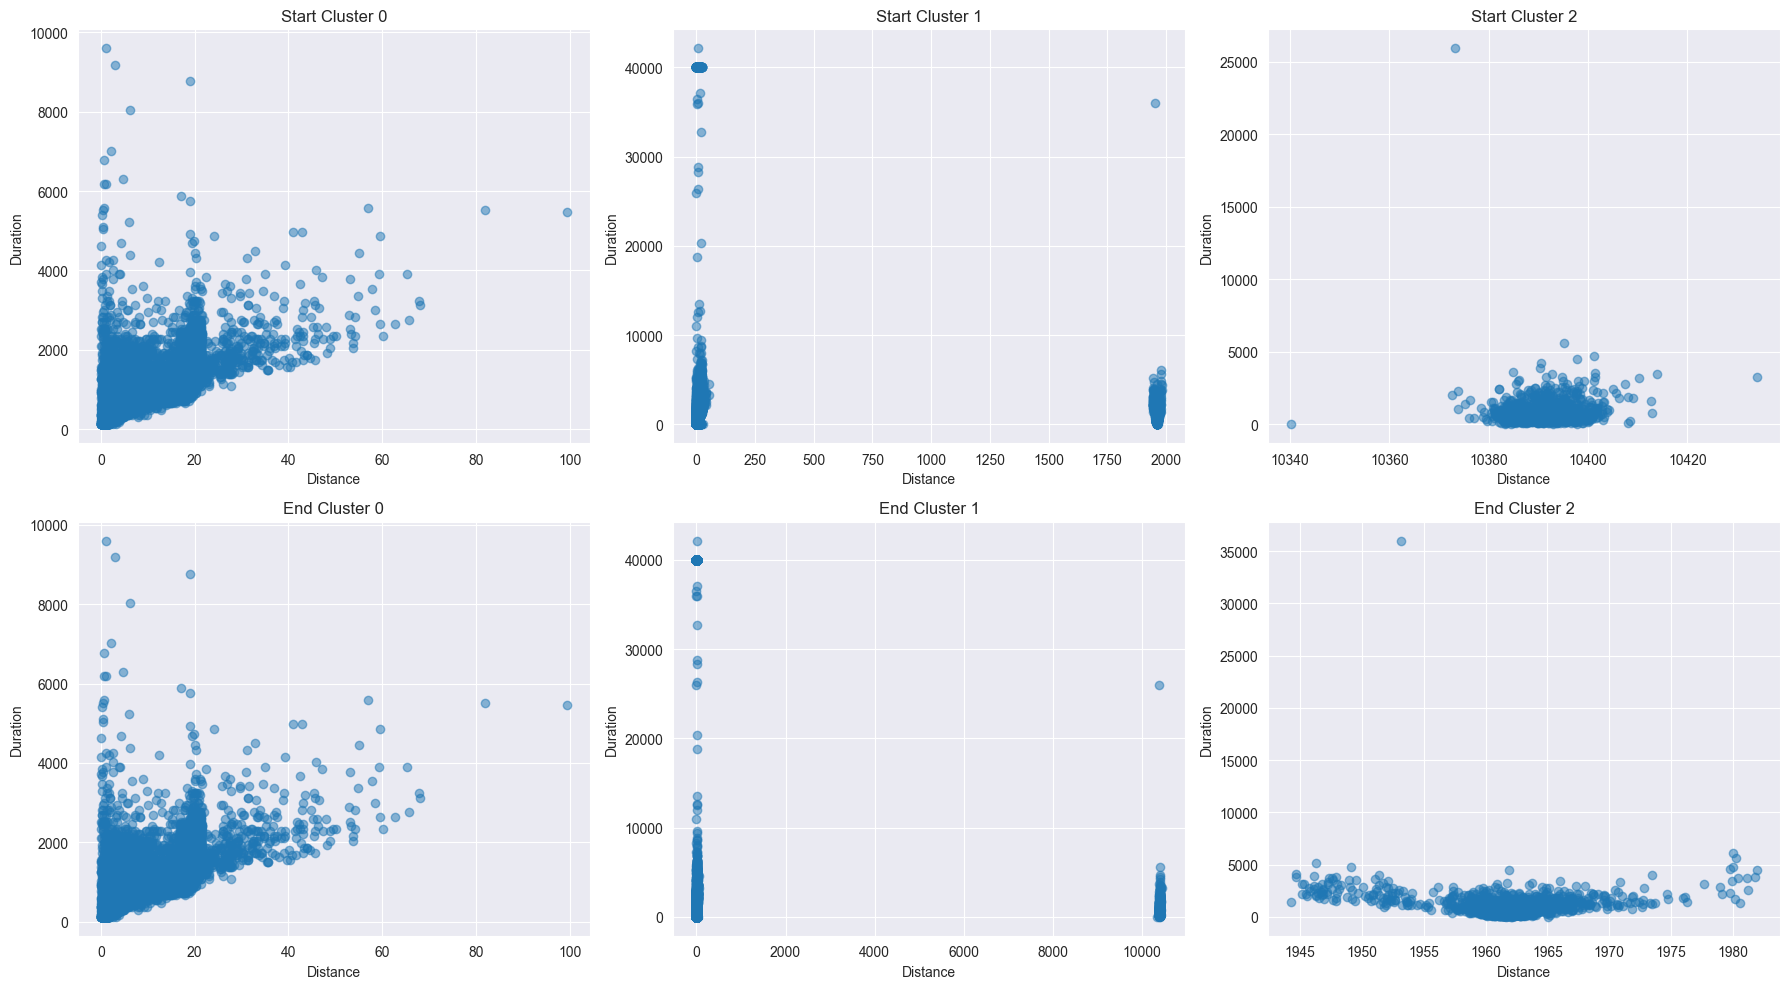

In [29]:
distance_df = DistanceCalculator().calculate(distance_df)
start_clusters = sorted(distance_df['start_cluster'].unique())
end_clusters = sorted(distance_df['end_cluster'].unique())

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, cluster in enumerate(start_clusters[:3]):
    ax = axes[i]
    data = distance_df[distance_df['start_cluster'] == cluster]
    ax.scatter(data['distance_km'], data['duration'], alpha=0.5)
    ax.set_title(f'Start Cluster {cluster}')
    ax.set_xlabel('Distance')
    ax.set_ylabel('Duration')

for i, cluster in enumerate(end_clusters[:3]):
    ax = axes[i + 3]
    data = distance_df[distance_df['end_cluster'] == cluster]
    ax.scatter(data['distance_km'], data['duration'], alpha=0.5)
    ax.set_title(f'End Cluster {cluster}')
    ax.set_xlabel('Distance')
    ax.set_ylabel('Duration')

for j in range(len(start_clusters), 3):
    fig.delaxes(axes[j])
for j in range(len(end_clusters), 3):
    fig.delaxes(axes[j + 3])

plt.tight_layout()
plt.show()

# Impossible values

In [30]:
def calculate_distance(df):
        EARTH_RADIUS_KM = 6371.0
        df_dist = df.copy()
        
        lat1 = np.radians(df_dist['start_lat'])
        lon1 = np.radians(df_dist['start_lng'])
        lat2 = np.radians(df_dist['end_lat'])
        lon2 = np.radians(df_dist['end_lng'])
        
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        
        df_dist['distance_km'] = c * EARTH_RADIUS_KM
        
        return df_dist

In [31]:
impossible_values_df = df.copy()
impossible_values_df.dropna(inplace=True)
impossible_values_df = calculate_distance(impossible_values_df)

In [32]:
print(len(impossible_values_df[impossible_values_df['duration'] < 0]))
print(len(impossible_values_df[impossible_values_df['duration'] == 0]))

0
500


In [33]:
print(len(impossible_values_df[impossible_values_df['distance_km'] < 0]))
print(len(impossible_values_df[impossible_values_df['distance_km'] == 0]))

0
505


In [34]:
impossible_values_df = impossible_values_df[impossible_values_df['duration'] > 0]
impossible_values_df = impossible_values_df[impossible_values_df['distance_km'] > 0]

print(len(impossible_values_df[impossible_values_df['duration'] < 0]))
print(len(impossible_values_df[impossible_values_df['duration'] == 0]))
print(len(impossible_values_df[impossible_values_df['distance_km'] < 0]))
print(len(impossible_values_df[impossible_values_df['distance_km'] == 0]))
speed = impossible_values_df['distance_km']/(impossible_values_df['duration']/60/60)

0
0
0
0


In [35]:
for i in range(0, int(max(speed))+1, 50):
    count = len(speed[(speed >= i) & (speed < i+50)])
    if count > 0:
        print(f"Speed {i} - {i+10}: {count}")

Speed 0 - 10: 136972
Speed 50 - 60: 3524
Speed 100 - 110: 1
Speed 150 - 160: 1
Speed 200 - 210: 1
Speed 1150 - 1160: 1
Speed 1250 - 1260: 1
Speed 1350 - 1360: 1
Speed 1400 - 1410: 1
Speed 1450 - 1460: 2
Speed 1550 - 1560: 3
Speed 1700 - 1710: 1
Speed 1750 - 1760: 2
Speed 1800 - 1810: 4
Speed 1850 - 1860: 1
Speed 1900 - 1910: 4
Speed 1950 - 1960: 3
Speed 2000 - 2010: 1
Speed 2050 - 2060: 4
Speed 2100 - 2110: 1
Speed 2150 - 2160: 2
Speed 2200 - 2210: 4
Speed 2250 - 2260: 5
Speed 2300 - 2310: 1
Speed 2350 - 2360: 2
Speed 2400 - 2410: 5
Speed 2450 - 2460: 5
Speed 2500 - 2510: 5
Speed 2550 - 2560: 6
Speed 2600 - 2610: 3
Speed 2650 - 2660: 1
Speed 2700 - 2710: 3
Speed 2750 - 2760: 3
Speed 2800 - 2810: 3
Speed 2850 - 2860: 5
Speed 2900 - 2910: 5
Speed 2950 - 2960: 4
Speed 3000 - 3010: 6
Speed 3050 - 3060: 5
Speed 3100 - 3110: 5
Speed 3150 - 3160: 9
Speed 3200 - 3210: 6
Speed 3250 - 3260: 7
Speed 3300 - 3310: 4
Speed 3350 - 3360: 9
Speed 3400 - 3410: 2
Speed 3450 - 3460: 6
Speed 3500 - 3510: 8

KeyboardInterrupt: 